In [1234]:
import pandas as pd

file_path="/content/drive/MyDrive/Food data.csv"
df= pd.read_csv(file_path)
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


▶  **SECTION # 1:  DATA EXPLORATION**

In [1235]:
#check shape
df.shape

(1822, 11)

**Insights:**

Rows = 1822

Columns = 11

In [1236]:
#check data types and null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


Insights:

               TYPE                                     NULL

ID : unnecessary column                      |          no

date : needs date typecasting to date        |          no

meals_served : need typecasting to int       |   yes

kitchen_staff : needs typecasting to int     |   yes

temperature_C : -                            |        no

humidity_percent : -                         |   yes

day_of_week :            |  no

special_event : typecasting to int           |  no

past_waste_kg : -                            |   yes

staff_experience : -                         |    yes

waste_category : -                           |    yes

ID and day_of_week are unnecessary columns for our use case so we have dropped them.

In [1237]:
# Dropping unnecessary columns i.e. ID , day_of_week

df = df.drop(['ID'], axis=1)


In [1238]:
# @title Part # 1: Data Type Casting


In [1239]:
# @title Numerical Columns


In [1240]:
# Check data types

print("\nData Types:")
print(df.dtypes)



Data Types:
date                 object
meals_served        float64
kitchen_staff        object
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event        object
past_waste_kg       float64
staff_experience     object
waste_category       object
dtype: object


meals_served, special_event and kitchen_staff have problematic data types. Hence, we check out the unique variety of values found in these columns.

In [1241]:
# check unique values in meals_served, special_event and kitchen_staff

type_cols=['meals_served', 'special_event', 'kitchen_staff']
for col in type_cols:
    print(f"\nColumn '{col}':")
    print(df[col].value_counts())
    print("---------------------------------------------")


Column 'meals_served':
meals_served
259.0     14
352.0     14
485.0     14
291.0     14
198.0     13
          ..
117.0      2
4680.0     1
284.0      1
102.0      1
2080.0     1
Name: count, Length: 373, dtype: int64
---------------------------------------------

Column 'special_event':
special_event
0       1666
1        148
One        8
Name: count, dtype: int64
---------------------------------------------

Column 'kitchen_staff':
kitchen_staff
12        143
5         138
10        130
13        127
9         127
15        123
18        121
14        117
7         117
11        116
19        116
6         113
17        108
16        103
8          99
ten         4
eleven      2
Name: count, dtype: int64
---------------------------------------------


Replacement and type casting is needed in the non-integer elements found in special_events and kitchen_staff columns. Date and meals_served also need type casting.

In [1242]:
# correct the incorect data

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = pd.to_numeric(df['day_of_week'], errors='coerce').astype('Int64')

df['meals_served'] = pd.to_numeric(df['meals_served'], errors='coerce').astype('Int64')

df['special_event'] = df['special_event'].astype(str).str.strip().str.lower()
df['special_event'] = df['special_event'].replace({'one': 1})
df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce').astype('Int64')

df['kitchen_staff'] = df['kitchen_staff'].astype(str).str.strip().str.lower()
df['kitchen_staff'] = df['kitchen_staff'].replace({'ten':10 , 'eleven': 11 })
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype('Int64')


In [1243]:
# Verify Data Types

print("\nData Types:")
print(df.dtypes)



Data Types:
date                datetime64[ns]
meals_served                 Int64
kitchen_staff                Int64
temperature_C              float64
humidity_percent           float64
day_of_week                  Int64
special_event                Int64
past_waste_kg              float64
staff_experience            object
waste_category              object
dtype: object


In [1244]:
# @title Categorical Columns


In [1245]:
categorical_cols = ['staff_experience','waste_category']

In [1246]:
# check unique values in obj-columns
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())



Unique values for staff_experience:
['intermediate' nan 'Beginner' 'Intermediate' 'EXPERT' 'Pro']

Unique values for waste_category:
['dairy' 'MeAt' 'MEAT' 'Vegetables' 'GRAINS' nan 'Wheat' 'Barley']


Difference in letter case found in staff_experience and waste_category columns. Hence, we should ensure uniformity in letter case.

In [1247]:
import numpy as np
df['staff_experience'] = df['staff_experience'].str.strip().str.lower()
df['waste_category'] = df['waste_category'].str.strip().str.lower()



In [1248]:
# Verify letter case

for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())



Unique values for staff_experience:
['intermediate' nan 'beginner' 'expert' 'pro']

Unique values for waste_category:
['dairy' 'meat' 'vegetables' 'grains' nan 'wheat' 'barley']


In [1249]:
# @title Part # 2 : Duplicates


In [1250]:
# duplicate in data set
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1817,True
1818,True
1819,True
1820,True


In [1251]:
#find number of duplicate rows
df.duplicated().sum()

np.int64(777)

In [1252]:
df = df.drop_duplicates()
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1783,False
1788,False
1792,False
1793,False


Total 777 duplicate rows were found whch have been removed successfully.

For a single date, we can have different waste_category, but presence of a single waste category more than once for a single date indicate duplicates. We find out the rows which have the group - date, waste_category as a duplicate group.

In [1253]:
# Filter rows with duplicates based on specific columns
duplicates = df[df.duplicated(subset=['date', 'waste_category'], keep=False)]

# Count and print the number of duplicate rows
print(f"Total duplicate rows: {duplicates.shape[0]}")

# Group by the three columns to find duplicate groups
duplicates_grouped = duplicates.groupby(['date', 'waste_category'])

# Print number of duplicate groups
print(f"Number of duplicate groups: {len(duplicates_grouped)}\n")


Total duplicate rows: 249
Number of duplicate groups: 121



In [1254]:
# Identify duplicates
duplicates = df[df.duplicated(subset=['date', 'waste_category'], keep=False)]

# Initialize a list to hold the best rows from duplicate groups
rows_to_keep = []

# Group duplicates by the target subset
duplicates_grouped = duplicates.groupby(['date', 'waste_category'])

# Loop through each duplicate group
for name, group in duplicates_grouped:
    if not group.empty:
        # Count non-null values across relevant columns
        non_null_counts = group[['meals_served', 'kitchen_staff', 'humidity_percent',
                                 'past_waste_kg', 'staff_experience', 'waste_category']].notnull().sum(axis=1)

        if non_null_counts.max() > 0:
            # Keep the row with the highest count of non-null fields
            max_non_null_row_index = non_null_counts.idxmax()
            rows_to_keep.append(group.loc[max_non_null_row_index])
        else:
            # If all values are null, randomly select one row
            random_row = group.sample(n=1)
            rows_to_keep.append(random_row.iloc[0])

# Combine the kept duplicate rows
df_cleaned = pd.concat(rows_to_keep, axis=1).T

# Make sure only one per group
df_cleaned = df_cleaned.drop_duplicates(subset=['date', 'waste_category', 'past_waste_kg'], keep='first')

# Keep non-duplicate rows from the original df
non_duplicates = df[~df.index.isin(duplicates.index)]

# Combine the cleaned duplicates with the non-duplicate rows
df = pd.concat([df_cleaned, non_duplicates], ignore_index=True)

# Optional: reset index and preview
df.reset_index(drop=True, inplace=True)
print(df.head())


                  date meals_served kitchen_staff temperature_C  \
0  2022-01-01 00:00:00          202             9     31.976787   
1  2022-01-02 00:00:00          448            16     10.092464   
2  2022-01-03 00:00:00          370            14     30.498673   
3  2022-01-04 00:00:00          206            11     15.715629   
4  2022-01-05 00:00:00          171            13     32.440281   

  humidity_percent day_of_week special_event past_waste_kg staff_experience  \
0        66.826645           5             0     45.445455     intermediate   
1        56.130327           6             0     29.890039     intermediate   
2        64.634984           0             0     41.551615         beginner   
3        74.284147           1             0     22.281919         beginner   
4        78.371753           2             0     34.982054              NaN   

  waste_category  
0           meat  
1         grains  
2     vegetables  
3           meat  
4          dairy  


In [1255]:
# Verify grouped duplicates
duplicates = df[df.duplicated(subset=['date', 'waste_category', 'past_waste_kg'], keep=False)]

# Count and print the number of duplicate rows
print(f"Total duplicate rows: {duplicates.shape[0]}")

# Group by the three columns to find duplicate groups
duplicates_grouped = duplicates.groupby(['date', 'waste_category', 'past_waste_kg'])

# Print number of duplicate groups
print(f"Number of duplicate groups: {len(duplicates_grouped)}\n")


Total duplicate rows: 0
Number of duplicate groups: 0



In [1256]:
# correct the incorect data

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_of_week'] = pd.to_numeric(df['day_of_week'], errors='coerce').astype('Int64')

df['meals_served'] = pd.to_numeric(df['meals_served'], errors='coerce').astype('Int64')

df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce').astype('Int64')

df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype('Int64')
df['emperature_C'] = pd.to_numeric(df['temperature_C'], errors='coerce').astype('float64')



In [1257]:
# @title Part # 3 : Classifying Numerical Data


In [1258]:
# Classification : Continuous or Discrete

numerical_cols= df.select_dtypes(include=np.number).columns


In [1259]:
# Classifying Numerical Columns

numerical_cols = df.select_dtypes(include=['number'])
numerical_cols.columns

Index(['meals_served', 'kitchen_staff', 'day_of_week', 'special_event',
       'emperature_C'],
      dtype='object')

In [1260]:

for col in numerical_cols.columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")

    #hence we take special event as discrete data


Column: meals_served
Number of unique values: 373

Column: kitchen_staff
Number of unique values: 15

Column: day_of_week
Number of unique values: 7

Column: special_event
Number of unique values: 2

Column: emperature_C
Number of unique values: 855


We conclude that all numerical columns, other than special_event are continuous. However, kitchen_staff can be classified as categoical due to 15 unique values

In [1261]:
# @title Part # 4 : Missing Values


In [1262]:
#overview of missing values

df.isnull().sum()


,0
date,0
meals_served,3
kitchen_staff,1
temperature_C,0
humidity_percent,1
day_of_week,0
special_event,0
past_waste_kg,0
staff_experience,172
waste_category,21


In [1263]:
#Checking the percentage of missing values in each column to see if it can be dropped

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values:
date                  0
meals_served          3
kitchen_staff         1
temperature_C         0
humidity_percent      1
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    172
waste_category       21
emperature_C          0
dtype: int64

Percentage of Missing Values:
date                 0.000000
meals_served         0.327154
kitchen_staff        0.109051
temperature_C        0.000000
humidity_percent     0.109051
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.000000
staff_experience    18.756816
waste_category       2.290076
emperature_C         0.000000
dtype: float64


None of the columns has greater tahn 50 % of null data. Hence, we cannot drop any column.

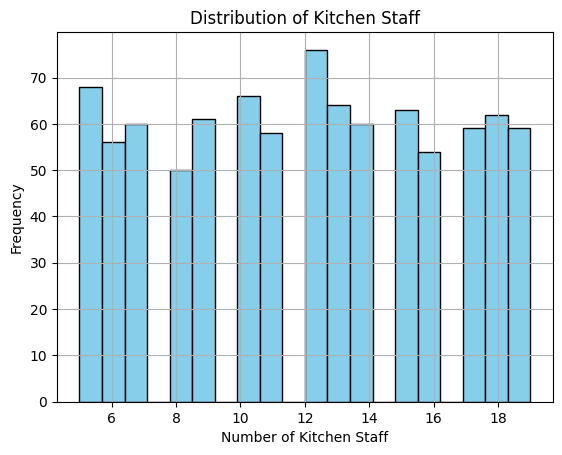

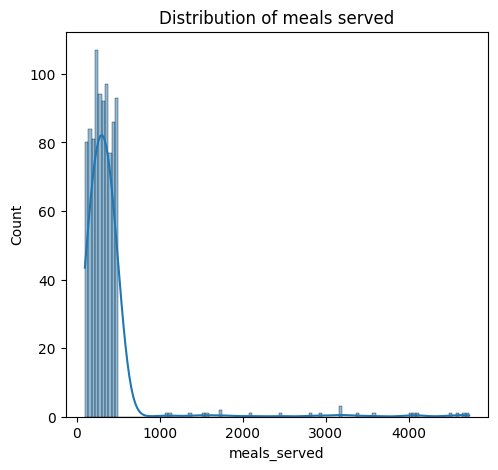

Mean: 369.20 kg
Median: 307.00 kg


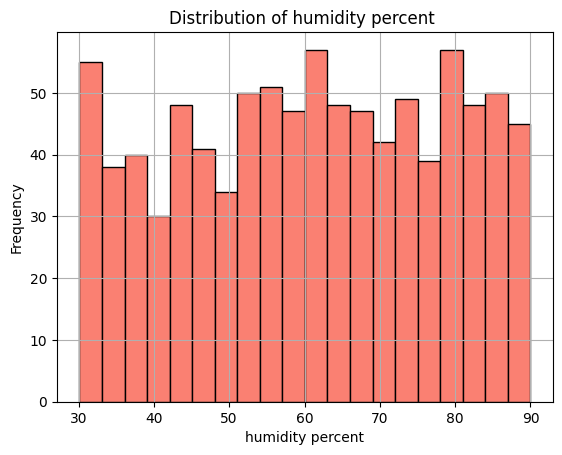

Mean: 60.90 kg
Median: 61.76 kg


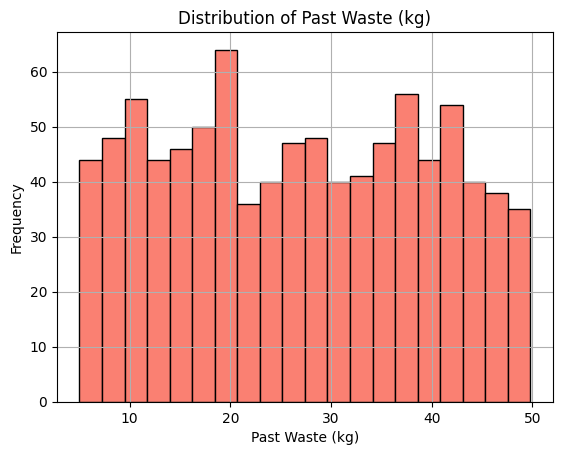

Mean: 26.81 kg
Median: 26.52 kg


In [1264]:
#draw histograms for continuous columns

import matplotlib.pyplot as plt
import seaborn as sns


# Histogram for kitchen_staff
plt.hist(df["kitchen_staff"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Kitchen Staff")
plt.xlabel("Number of Kitchen Staff")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()    #seems categorical


#meals served (very left skewed->use median)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['meals_served'].dropna(), kde=True)
plt.title('Distribution of meals served')
plt.show()
mean_meals_served = df["meals_served"].mean()
median_meals_served = df["meals_served"].median()
print(f"Mean: {mean_meals_served:.2f} kg")
print(f"Median: {median_meals_served:.2f} kg")


# Histogram for humidity (almost normal-> use mean)
plt.hist(df["humidity_percent"].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of humidity percent ")
plt.xlabel("humidity percent")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
mean_humidity_percent = df["humidity_percent"].mean()
median_humidity_percent = df["humidity_percent"].median()
print(f"Mean: {mean_humidity_percent:.2f} kg")
print(f"Median: {median_humidity_percent:.2f} kg")

# Histogram for past_waste_kg (a bit right skewed->use median)
plt.hist(df["past_waste_kg"].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Past Waste (kg)")
plt.xlabel("Past Waste (kg)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
mean_waste = df["past_waste_kg"].mean()
median_waste = df["past_waste_kg"].median()
print(f"Mean: {mean_waste:.2f} kg")
print(f"Median: {median_waste:.2f} kg")



Insights:

1. We can categorze kitchen_staff as categorical data.

2. Histogram for Humidity s almost normal, we can use mean as a replacement.

3. Histogram for Meals Seved is highly left-skewed.

4. Histogram for Past Waste kg is also left-skewed.



In [1265]:
# use mean for humidity
# Calculate the median of 'past_waste_kg' column
mean_humidity_percent = df['humidity_percent'].mean()
# Fill null values in 'past_waste_kg' with the median (avoiding inplace=True)
df['humidity_percent'] = df['humidity_percent'].fillna(mean_humidity_percent)
# Verify if the nulls are filled
print(df['humidity_percent'].isnull().sum())


0


<ipython-input-1265-c3335139a3ae>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['humidity_percent'] = df['humidity_percent'].fillna(mean_humidity_percent)


In [1266]:

# Calculate the median of 'past_waste_kg' column
median_past_waste = df['past_waste_kg'].median()
# Fill null values in 'past_waste_kg' with the median (avoiding inplace=True)
df['past_waste_kg'] = df['past_waste_kg'].fillna(median_past_waste)
# Verify
print(df['past_waste_kg'].isnull().sum())


# Calculate the median of 'meals_served' column
median_meals_served = df['meals_served'].median()
# Fill null values in 'meals_served' with the median (avoiding inplace=True)
df['meals_served'] = df['meals_served'].fillna(median_meals_served)
# Verify
print(df['meals_served'].isnull().sum())





0
0


<ipython-input-1266-d2e9ec34f59e>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['past_waste_kg'] = df['past_waste_kg'].fillna(median_past_waste)


In [1267]:
# fillng categorical columns with Mode

# Replace missing values in 'kitchen_staff' with the mode (most frequent value)
mode_kitchen_staff = df['kitchen_staff'].mode()[0]
df['kitchen_staff'] = df['kitchen_staff'].fillna(mode_kitchen_staff)

# Replace missing values in 'staff_experience' with the mode (most frequent value)
mode_staff_experience = df['staff_experience'].mode()[0]
df['staff_experience'] = df['staff_experience'].fillna(mode_staff_experience)


# Replace missing values in 'waste_category' with the mode (most frequent value)
mode_waste_category = df['waste_category'].mode()[0]
df['waste_category'] = df['waste_category'].fillna(mode_waste_category)

# Verify if the missing values have been filled
print(f"Missing values in 'kitchen_staff': {df['kitchen_staff'].isnull().sum()}")
print(f"Missing values in 'staff_experience': {df['staff_experience'].isnull().sum()}")
print(f"Missing values in 'waste_category': {df['waste_category'].isnull().sum()}")



Missing values in 'kitchen_staff': 0
Missing values in 'staff_experience': 0
Missing values in 'waste_category': 0


In [1268]:
df.isnull().sum()


,0
date,0
meals_served,0
kitchen_staff,0
temperature_C,0
humidity_percent,0
day_of_week,0
special_event,0
past_waste_kg,0
staff_experience,0
waste_category,0


In [1269]:
# @title Part # 5 : Outliers


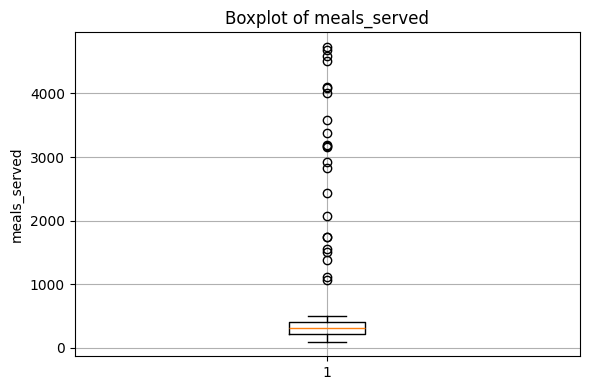

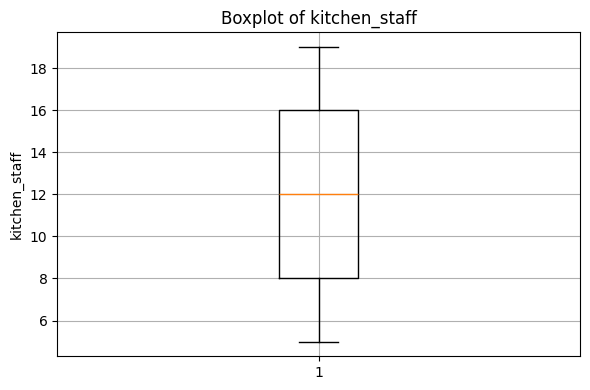

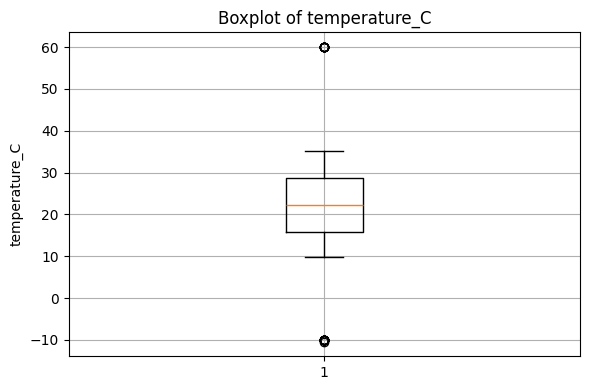

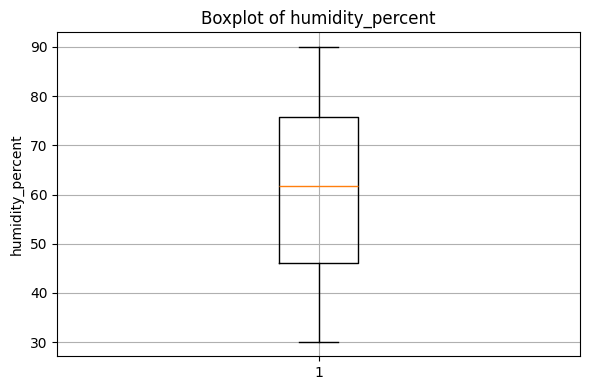

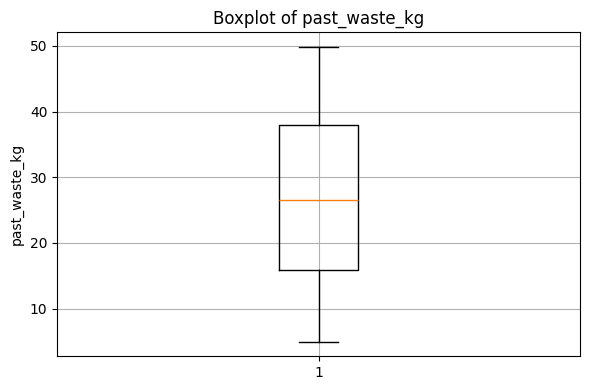

In [1270]:
import matplotlib.pyplot as plt

continuous_cols = ['meals_served','kitchen_staff','temperature_C','humidity_percent','past_waste_kg']

# Plot boxplots in a loop
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

We can see outlers in meals seved and temperature. However, we need to further explore to see how can we deal with these outliers.

In [1271]:
# @title Checking the validity of Meals served outliers


Strategy: We can check if number of meals served positively correlates wth special event. If so, outliers are invald and shouldnot be removed. Otherwise, they are valid

<ipython-input-1272-4973b83609ef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='special_event', y='meals_served', data=df, palette='coolwarm')


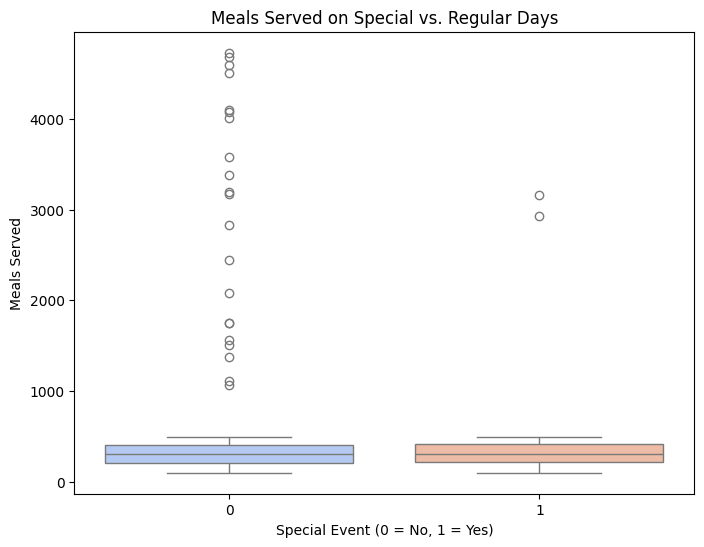

In [1272]:
# Checking if meals served correlate with special occasion
# ans: No
plt.figure(figsize=(8, 6))
sns.boxplot(x='special_event', y='meals_served', data=df, palette='coolwarm')
plt.title('Meals Served on Special vs. Regular Days')
plt.xlabel('Special Event (0 = No, 1 = Yes)')
plt.ylabel('Meals Served')
plt.show()

We can see that there is no positive correlation between the meals served and special event. Hence, we need to remove them.

In [1273]:
#remove meals_served outliers

# # Calculate 95th percentile
p95 = df['meals_served'].quantile(0.95)

# Keep only rows with meals_served <= 95th percentile
df = df[df['meals_served'] <= p95]

In [1274]:
# @title Checking Validity of Temperature Outliers


Since we know that -10 and 60 degree centigrades are impractical temperatures. They donot resonate with the temperature range we can se normally in dataset. Hence , they must be fixed using IQR method.

In [1275]:
# Calculate IQR
Q1 = df['temperature_C'].quantile(0.25)
Q3 = df['temperature_C'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['temperature_C'] = df['temperature_C'].clip(lower=lower_bound, upper=upper_bound)


<ipython-input-1275-5ec5f964b4e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperature_C'] = df['temperature_C'].clip(lower=lower_bound, upper=upper_bound)


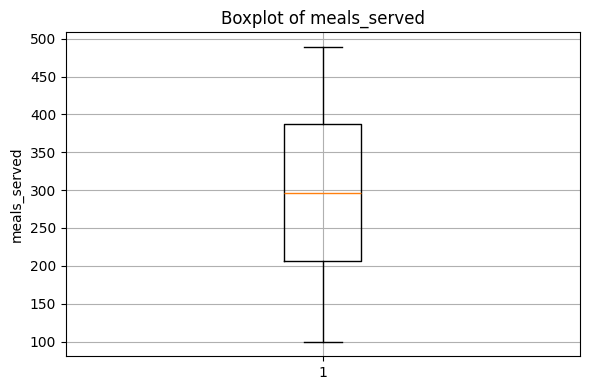

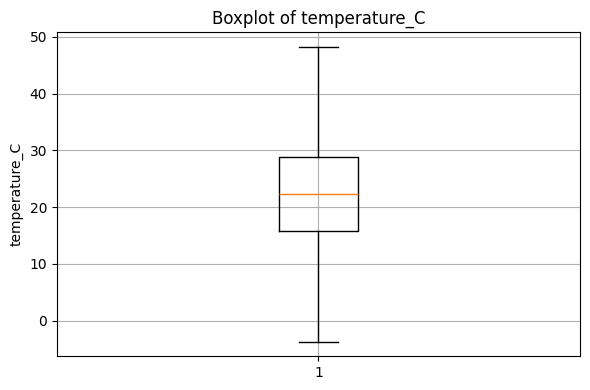

In [1276]:
#Verify


import matplotlib.pyplot as plt

temp_meal_cols = ['meals_served','temperature_C']

# Plot boxplots in a loop
for col in temp_meal_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [1277]:
# 4. Verify Cleaning
print("\nData Types after cleaning:")
print(df.dtypes)

print("\nMissing Values after cleaning:")
print(df.isnull().sum())

print("\nShape of DataFrame after removing duplicates:")
print(df.shape)


Data Types after cleaning:
date                datetime64[ns]
meals_served                 Int64
kitchen_staff                Int64
temperature_C               object
humidity_percent           float64
day_of_week                  Int64
special_event                Int64
past_waste_kg              float64
staff_experience            object
waste_category              object
emperature_C               float64
dtype: object

Missing Values after cleaning:
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
emperature_C        0
dtype: int64

Shape of DataFrame after removing duplicates:
(871, 11)


In [1278]:
# @title Section # 2 : DATA ANALYSIS


In [1279]:
# @title DESCRIPTIVE ANALYSIS


In [1280]:
# Descriptive analysis

numerical_cols = df.select_dtypes(include=['number'])
print("Descriptive Statistics for Numerical Columns:")
display(numerical_cols.describe())

Descriptive Statistics for Numerical Columns:


,meals_served,kitchen_staff,humidity_percent,day_of_week,special_event,past_waste_kg,emperature_C
count,871.0,871.0,871.000000,871.0,871.0,871.000000,871.000000
mean,297.825488,12.014925,61.057266,2.989667,0.088404,26.952103,22.261796
std,111.001333,4.300335,17.334946,1.999686,0.284045,12.765051,8.951756
min,100.0,5.0,30.121111,0.0,0.0,5.008394,-10.372207
25%,206.0,8.0,46.102069,1.0,0.0,16.164922,15.774501
50%,296.0,12.0,61.935452,3.0,0.0,26.811028,22.404160
75%,388.0,16.0,76.245694,5.0,0.0,37.938888,28.753437
max,489.0,19.0,89.982828,6.0,1.0,49.803703,60.000000


1. Meals Served
Meals served vary widely (100–489) with an average of ~298, showing high day-to-day demand changes. Distribution is fairly symmetrical, making it a key factor to explore in relation to waste and staffing.

2. Kitchen Staff
Staff count ranges from 5 to 19, averaging 12. Moderate variability suggests dynamic staffing, likely adjusting with demand. It's important for understanding efficiency and potential waste impacts.

3. Humidity Percent
Humidity ranges from 30% to 90%, with a mean of 61% and high variability. This can affect food spoilage and should be considered in waste analysis.

4. Day of Week
Days are evenly represented (0–6), with a mean of ~3. Weekly patterns may influence meals and waste; grouping by day could reveal trends.

5. Special Event
Special events are rare (~9% of days), but likely lead to operational spikes. These days should be analyzed separately due to their impact on meals and waste.

6. Past Waste (kg)
Food waste averages ~27 kg/day, with large variation (5–50 kg). Its symmetrical distribution makes it suitable for modeling with other variables like meals, staff, and humidity.

In [1281]:
# @title BAR CHARTS



Value Counts for date:
date
2022-02-16    3
2024-07-13    2
2022-11-11    2
2023-04-19    2
2022-05-07    2
             ..
2022-12-09    1
2023-08-29    1
2023-06-11    1
2022-03-07    1
2022-10-26    1
Name: count, Length: 825, dtype: int64


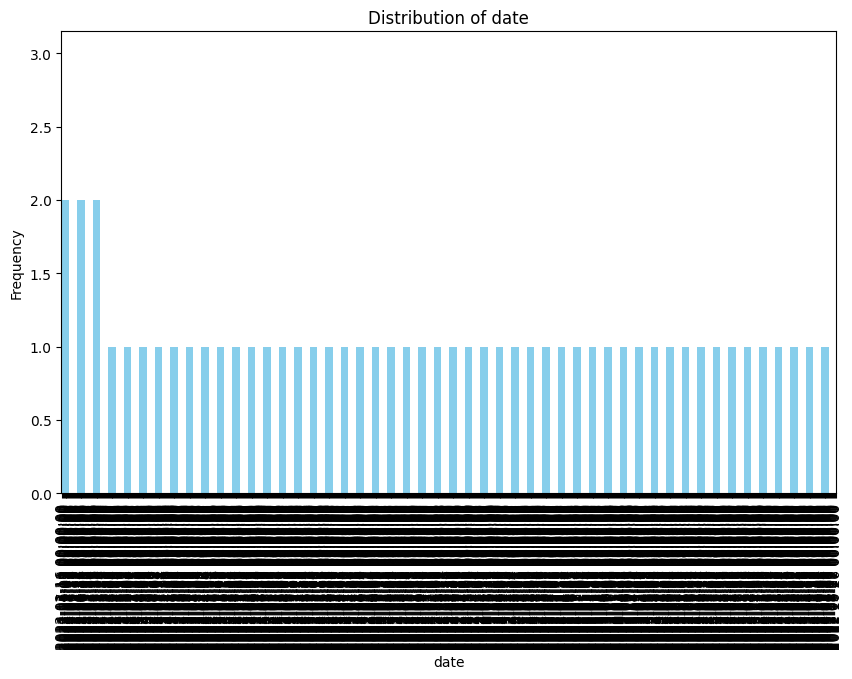


Value Counts for temperature_C:
temperature_C
-3.693903     13
 48.221842     9
 19.381498     2
 16.091418     2
 34.833423     2
              ..
 25.015239     1
 30.628267     1
 26.759636     1
 25.123848     1
 18.456578     1
Name: count, Length: 812, dtype: int64


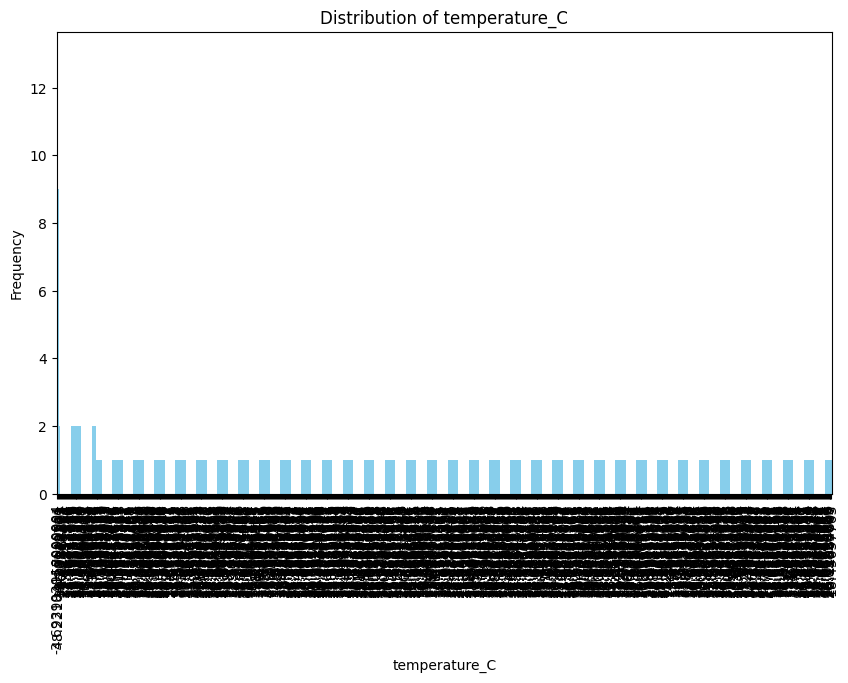


Value Counts for staff_experience:
staff_experience
intermediate    515
beginner        174
expert          163
pro              19
Name: count, dtype: int64


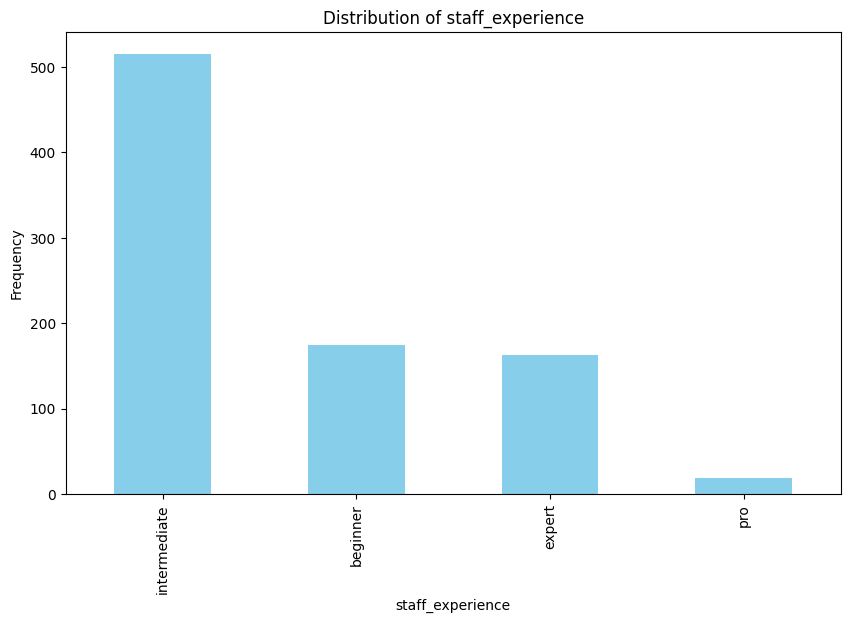


Value Counts for waste_category:
waste_category
meat          362
grains        162
dairy         161
vegetables    159
barley         14
wheat          13
Name: count, dtype: int64


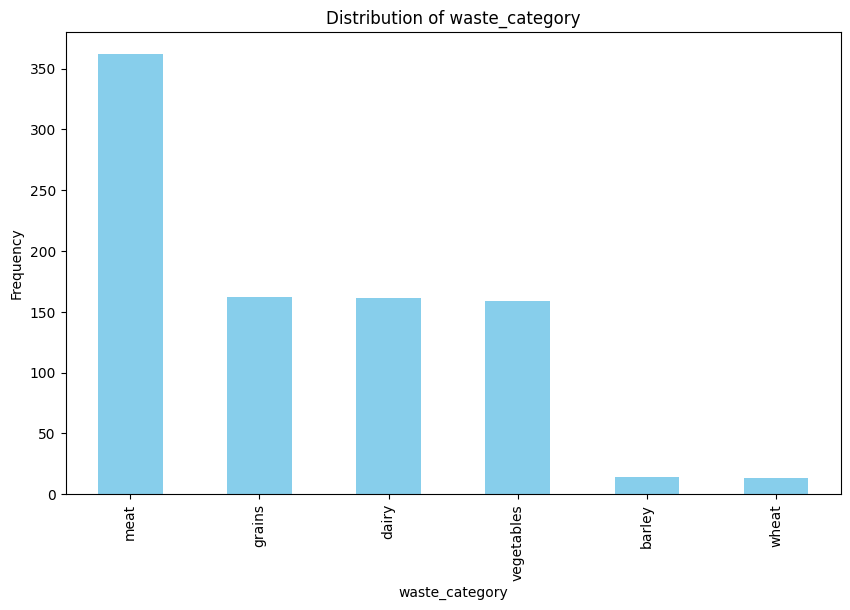

In [1282]:
# 2. Categorical Analysis
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))  # Adjust figure size
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Insights:

1. Temperature
Food waste tends to spike on extreme colder days, suggesting storage or consumption issues in low temperatures.

2. Staff Experience
Most staff are at the intermediate level (~500 entries), while beginners and experts are fewer (~170), and pros are rare (~15). This suggests mid-level staff performance may heavily influence waste levels.

3. Waste Category
Meat is the most wasted category (~360), far more than grains, dairy, and vegetables (~160 each). Barley and wheat have minimal waste (~15), indicating focus should be on managing meat-related waste.

In [1283]:
# @title CORRELATION ANALYSIS


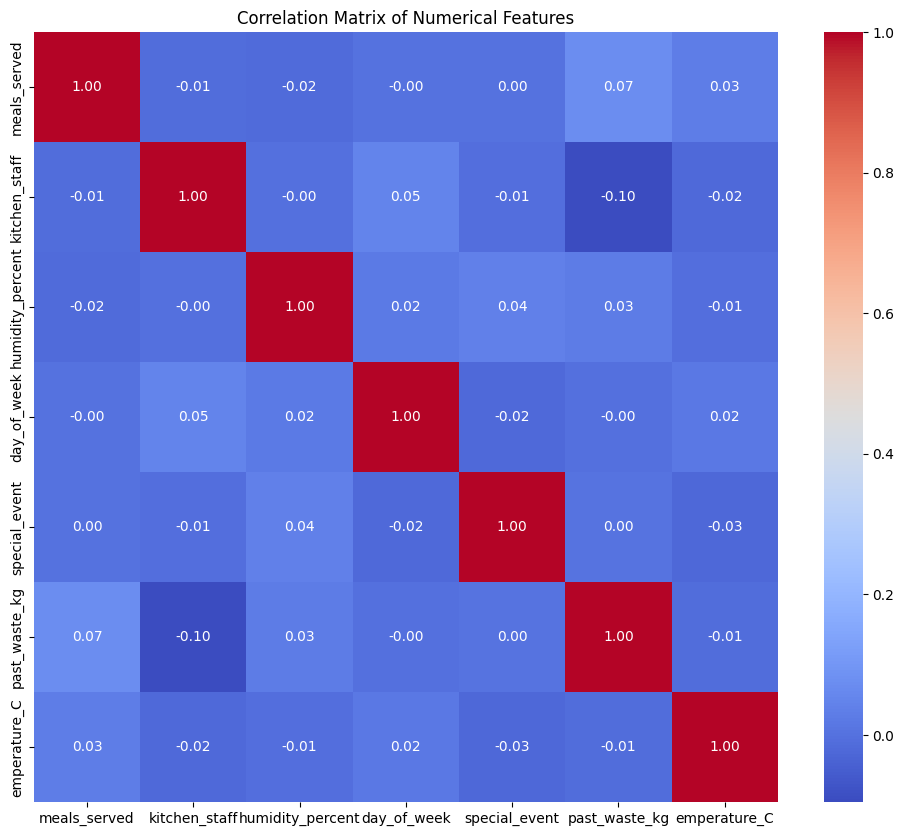

In [1284]:
# 3. Correlation Analysis
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [1285]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix.round(2))  # rounding for easier readability


Correlation Matrix:

                  meals_served  kitchen_staff  humidity_percent  day_of_week  \
meals_served              1.00          -0.01             -0.02        -0.00   
kitchen_staff            -0.01           1.00             -0.00         0.05   
humidity_percent         -0.02          -0.00              1.00         0.02   
day_of_week              -0.00           0.05              0.02         1.00   
special_event             0.00          -0.01              0.04        -0.02   
past_waste_kg             0.07          -0.10              0.03        -0.00   
emperature_C              0.03          -0.02             -0.01         0.02   

                  special_event  past_waste_kg  emperature_C  
meals_served               0.00           0.07          0.03  
kitchen_staff             -0.01          -0.10         -0.02  
humidity_percent           0.04           0.03         -0.01  
day_of_week               -0.02          -0.00          0.02  
special_event          

Insights:
1. Meals Served
Has almost no correlation with any other variable (all values between -0.02 and 0.07). This suggests that meals served varies independently of staffing, humidity, day of the week, and even special events.

2. Kitchen Staff
Shows a slight negative correlation with past waste (-0.10), implying that more staff may help reduce food waste, though the effect is weak. No other meaningful correlations observed.

3. Humidity Percent
Has very low correlations across all variables. While it might affect operations in specific contexts (e.g., storage), it doesn’t show a clear statistical relationship here.

4. Day of Week
Has no meaningful correlation with any variable, including meals served and waste. This suggests your operations are fairly consistent throughout the week.

5. Special Event
Shows no correlation with other variables, including meals served and waste. This might indicate that either special events don’t significantly change operations or they are too rare to influence correlations.

6. Past Waste (kg)
Shows a weak positive correlation with meals served (0.07) and a weak negative one with kitchen staff (-0.10). This suggests that more meals can slightly increase waste, and more staff might slightly reduce it, though both effects are minimal.

7. Temperature:
Temperature shows no meaningful correlation with past waste (correlation = -0.01) or any other variable in the dataset, indicating it likely doesn't influence outcomes directly.

In [1286]:
# @title BOX PLOTS (Meals Served)



Relationship between Meals Served and Special Occasion:


<ipython-input-1287-78b9a8b66ece>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='special_event', y='meals_served', data=df, palette="Set3")


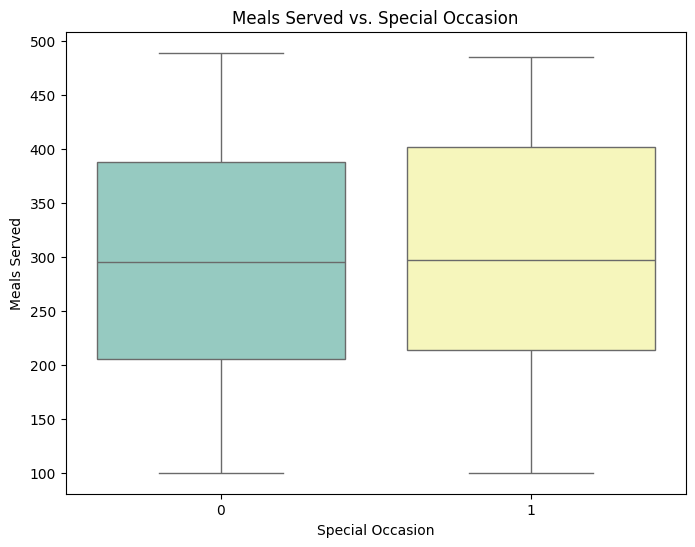

In [1287]:
continuous_columns = ['meals_served','temperature', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

print("\nRelationship between Meals Served and Special Occasion:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='special_event', y='meals_served', data=df, palette="Set3")
plt.title('Meals Served vs. Special Occasion')
plt.xlabel('Special Occasion')
plt.ylabel('Meals Served')
plt.show()

In [1288]:
# Calculate summary statistics for meals served based on special_event
meals_special_event_stats = df.groupby('special_event')['meals_served'].describe()

# Print the results
print("Summary Statistics for Meals Served by Special Event:")
print(meals_special_event_stats)


Summary Statistics for Meals Served by Special Event:
               count        mean         std    min     25%    50%     75%  \
special_event                                                                
0              794.0   297.75063  110.805845  100.0  205.25  295.5  387.75   
1               77.0  298.597403  113.732981  100.0   214.0  297.0   402.0   

                 max  
special_event         
0              489.0  
1              485.0  


Insights:

Special events cause a slight increase in meals served, but the overall pattern and variability are similar to non-special event days.

<ipython-input-1289-af14d2decf74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kitchen_staff', y='meals_served', data=df, palette="Set3")



Relationship between Meals Served and Special Occasion:


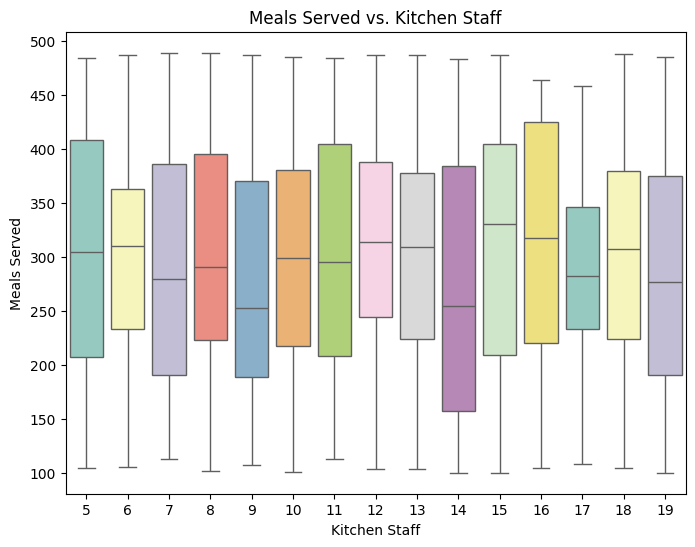

In [1289]:
print("\nRelationship between Meals Served and Special Occasion:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='kitchen_staff', y='meals_served', data=df, palette="Set3")
plt.title('Meals Served vs. Kitchen Staff')
plt.xlabel('Kitchen Staff')
plt.ylabel('Meals Served')
plt.show()

In [1290]:
# Calculate summary statistics for meals served based on kitchen_staff
meals_kitchen_staff_stats = df.groupby('kitchen_staff')['meals_served'].describe()

# Print the results
print("Summary Statistics for Meals Served by Kitchen Staff:")
print(meals_kitchen_staff_stats)


Summary Statistics for Meals Served by Kitchen Staff:
               count        mean         std    min     25%    50%     75%  \
kitchen_staff                                                                
5               63.0  299.793651  113.265341  104.0   207.5  304.0   408.0   
6               54.0  305.851852  102.441775  105.0   233.0  310.0   362.5   
7               58.0  290.965517  117.632041  113.0   190.5  279.5   386.0   
8               47.0  305.319149  114.662095  102.0   222.5  291.0   395.5   
9               57.0  276.333333  111.722285  107.0   189.0  253.0   370.0   
10              62.0  306.467742  111.509717  101.0   217.5  298.5   380.5   
11              55.0  303.890909  113.973141  113.0   208.5  295.0   404.5   
12              73.0  309.616438  112.370744  103.0   244.0  314.0   388.0   
13              60.0      299.95  107.212987  103.0   224.0  309.5   377.5   
14              54.0  266.944444  116.852498  100.0   157.5  254.5   384.5   
15        

Insights:

Meal servings generally increase with the number of kitchen staff, particularly between levels 6 to 16, where staff serve the highest averages of 305-317 meals. Variability in meals served tends to decrease as staff size grows, indicating better operational efficiency at these levels. In contrast, staff with 5 or 9 members tend to serve fewer meals, with higher variability, suggesting potential inefficiencies or lower workloads. Overall, the optimal number of kitchen staff appears to be around 6-16 for maximizing meal service capacity.


Relationship between Meals Served and Staff Experience:


<ipython-input-1291-f09053e41639>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='staff_experience', y='meals_served', data=df, palette="Set3")


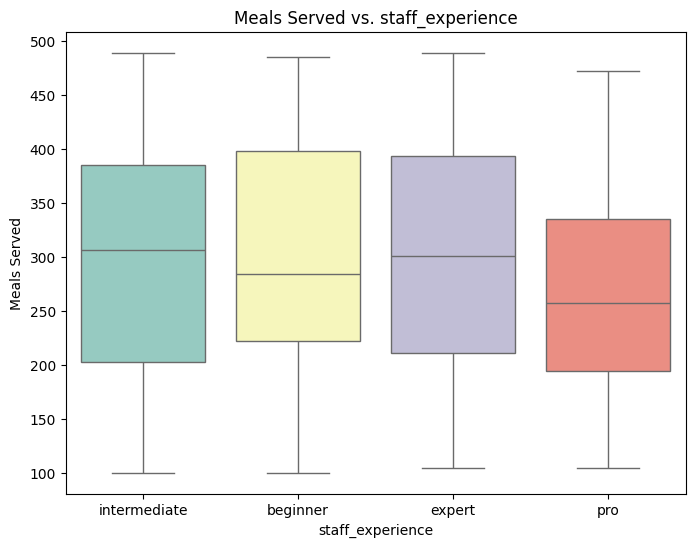

In [1291]:
print("\nRelationship between Meals Served and Staff Experience:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='staff_experience', y='meals_served', data=df, palette="Set3")
plt.title('Meals Served vs. staff_experience')
plt.xlabel('staff_experience')
plt.ylabel('Meals Served')
plt.show()

In [1292]:
# Calculate summary statistics for meals served based on staff_experience
meals_staff_experience_stats = df.groupby('staff_experience')['meals_served'].describe()

# Print the results
print("Summary Statistics for Meals Served by Staff Experience:")
print(meals_staff_experience_stats)


Summary Statistics for Meals Served by Staff Experience:
                  count        mean         std    min    25%    50%     75%  \
staff_experience                                                               
beginner          174.0  296.701149  108.125876  100.0  221.5  283.5  398.25   
expert            163.0  301.239264  113.358158  104.0  211.0  301.0   393.0   
intermediate      515.0  298.227184  111.446838  100.0  202.5  306.0   385.0   
pro                19.0  267.947368  108.522642  104.0  194.5  257.0   335.0   

                    max  
staff_experience         
beginner          485.0  
expert            489.0  
intermediate      489.0  
pro               472.0  


Insights:

Staff experience does not show a clear trend in increasing meals served, but intermediate and expert staff tend to serve the most meals on average. The pro staff group, despite their advanced experience, serves fewer meals on average, suggesting possible inefficiencies or a specialized role.

In [1293]:
# @title BOX PLOTS (past waste kg)



Relationship between Past Waste kg and Staff Experience:


<ipython-input-1294-a22d24f43b3d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='staff_experience', y='past_waste_kg', data=df, palette="Set3")


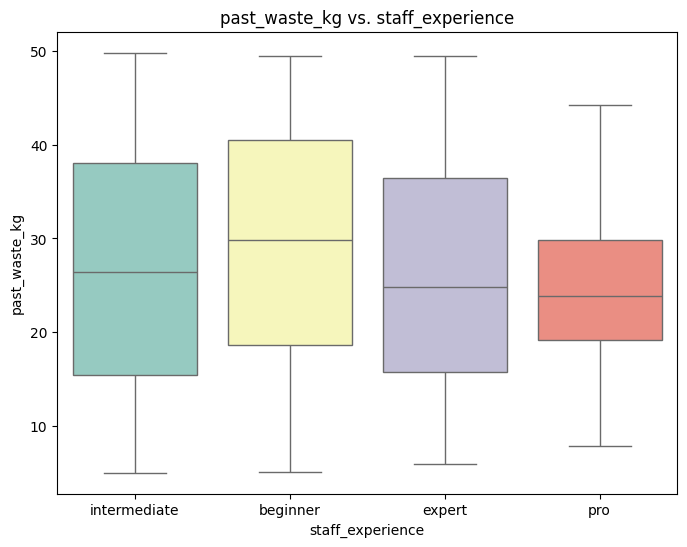

In [1294]:
continuous_columns = ['meals_served','temperature', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

print("\nRelationship between Past Waste kg and Staff Experience:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='staff_experience', y='past_waste_kg', data=df, palette="Set3")
plt.title('past_waste_kg vs. staff_experience')
plt.xlabel('staff_experience')
plt.ylabel('past_waste_kg')
plt.show()

In [1295]:
# Summary statistics for Past Waste (kg) by Waste Category
waste_category_stats = df.groupby('waste_category')['past_waste_kg'].describe()

# Print the summary statistics
print(waste_category_stats)


                count       mean        std       min        25%        50%  \
waste_category                                                                
barley           14.0  21.242565  12.615331  8.137374  12.548890  17.192246   
dairy           161.0  27.102401  12.732695  5.041824  16.508467  27.993683   
grains          162.0  26.100783  12.418607  5.008394  15.990760  25.516709   
meat            362.0  27.193603  12.891199  5.231283  15.984555  27.766182   
vegetables      159.0  28.102817  12.822762  5.472214  17.325923  28.205445   
wheat            13.0  21.049238  11.875892  6.084959  10.786842  19.020728   

                      75%        max  
waste_category                        
barley          24.015382  44.206323  
dairy           37.538224  48.342156  
grains          36.432242  49.635014  
meat            37.882425  49.803703  
vegetables      40.281887  49.733674  
wheat           26.811028  49.153170  


Meat, Dairy, and Vegetables have higher average waste values (27.19 kg, 27.10 kg, 28.10 kg, respectively), with Meat showing the most variation.

Barley and Wheat have lower average waste (21.24 kg, 21.05 kg) and fewer data points (14 and 13 entries).

Wheat has the least variation due to its smaller sample size.


Relationship between Past Waste kg and waste_category:


<ipython-input-1296-ecc38db79783>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='waste_category', y='past_waste_kg', data=df, palette="Set3")


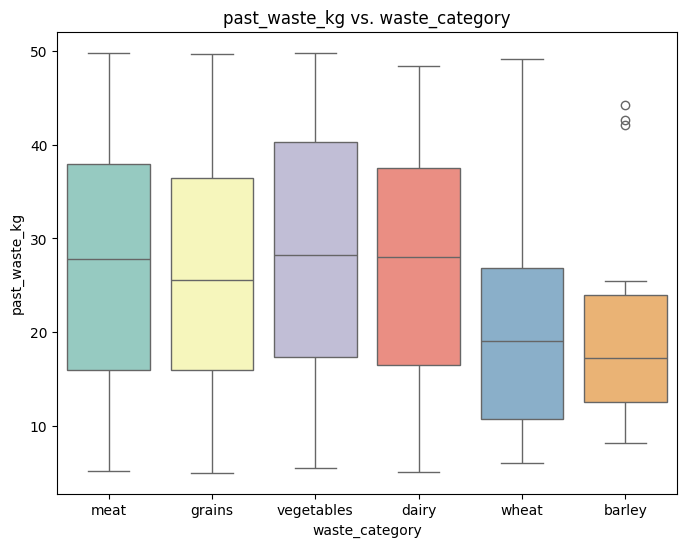

In [1296]:
continuous_columns = ['meals_served','temperature', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

print("\nRelationship between Past Waste kg and waste_category:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='waste_category', y='past_waste_kg', data=df, palette="Set3")
plt.title('past_waste_kg vs. waste_category')
plt.xlabel('waste_category')
plt.ylabel('past_waste_kg')
plt.show()

In [1297]:
# Summary statistics for past_waste_kg by waste_category
waste_category_stats = df.groupby('waste_category')['past_waste_kg'].describe()

# Print the summary statistics
print(waste_category_stats)


                count       mean        std       min        25%        50%  \
waste_category                                                                
barley           14.0  21.242565  12.615331  8.137374  12.548890  17.192246   
dairy           161.0  27.102401  12.732695  5.041824  16.508467  27.993683   
grains          162.0  26.100783  12.418607  5.008394  15.990760  25.516709   
meat            362.0  27.193603  12.891199  5.231283  15.984555  27.766182   
vegetables      159.0  28.102817  12.822762  5.472214  17.325923  28.205445   
wheat            13.0  21.049238  11.875892  6.084959  10.786842  19.020728   

                      75%        max  
waste_category                        
barley          24.015382  44.206323  
dairy           37.538224  48.342156  
grains          36.432242  49.635014  
meat            37.882425  49.803703  
vegetables      40.281887  49.733674  
wheat           26.811028  49.153170  


meat, vegetables, and dairy have the most substantial range of waste, whereas barley and wheat show smaller ranges. However, the variability within each category suggests that food waste patterns fluctuate even within the same waste category.


Relationship between Past Waste kg and staff_experience:


<ipython-input-1298-717c4e414262>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='staff_experience', y='past_waste_kg', data=df, palette="Set3")


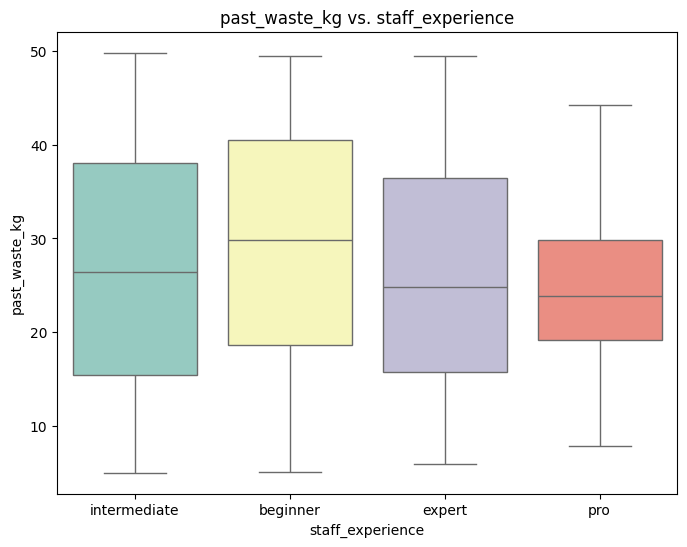

In [1298]:
continuous_columns = ['meals_served','temperature', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

print("\nRelationship between Past Waste kg and staff_experience:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='staff_experience', y='past_waste_kg', data=df, palette="Set3")
plt.title('past_waste_kg vs. staff_experience')
plt.xlabel('staff_experience')
plt.ylabel('past_waste_kg')
plt.show()

In [1299]:
# Summary Statistics for Past Waste by Staff Experience
past_waste_by_experience = df.groupby('staff_experience')['past_waste_kg'].describe()

# Print the summary statistics
print(past_waste_by_experience)


                  count       mean        std       min        25%        50%  \
staff_experience                                                                
beginner          174.0  28.962801  12.766404  5.073969  18.627345  29.860764   
expert            163.0  25.839783  12.251123  5.934111  15.761782  24.824262   
intermediate      515.0  26.685061  12.957530  5.008394  15.448609  26.440757   
pro                19.0  25.319099  10.438425  7.840846  19.170005  23.823100   

                        75%        max  
staff_experience                        
beginner          40.432648  49.484299  
expert            36.432347  49.395340  
intermediate      38.020275  49.803703  
pro               29.826474  44.209186  


Insights:

Beginner staff members tend to have a higher average past waste (28.96 kg), with a wider range of waste values (from 5.07 kg to 49.48 kg).

Expert staff members have slightly lower average waste (25.84 kg) and also exhibit a moderate range of waste, with values between 5.93 kg and 49.40 kg.

Intermediate staff members have an average waste of 26.69 kg, with waste values spread from 5.01 kg to 49.80 kg, similar to experts.

Pro staff members have the lowest average waste (25.32 kg), with the smallest spread (7.84 kg to 44.21 kg), indicating less variation in waste.

The data suggests that staff experience has a minimal effect on the amount of food waste, though beginners show slightly higher waste compared to more experienced staff.


Relationship between Past Waste kg and special_event:


<ipython-input-1300-159e9a92f28a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='special_event', y='past_waste_kg', data=df, palette="Set3")


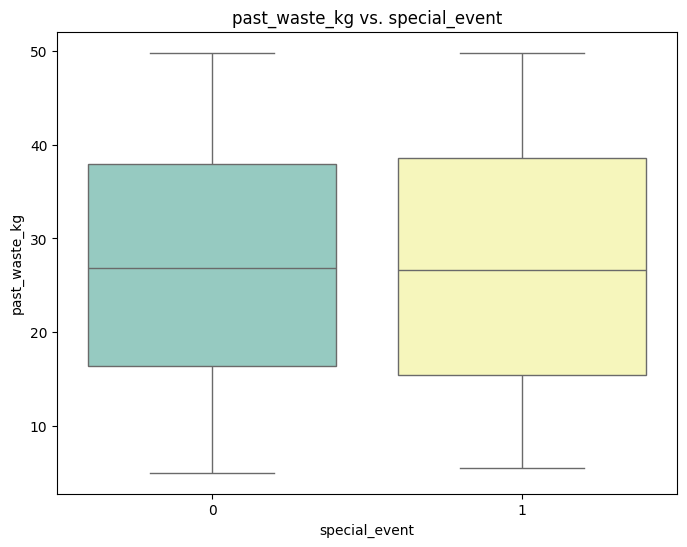

In [1300]:
continuous_columns = ['meals_served','temperature', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

print("\nRelationship between Past Waste kg and special_event:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='special_event', y='past_waste_kg', data=df, palette="Set3")
plt.title('past_waste_kg vs. special_event')
plt.xlabel('special_event')
plt.ylabel('past_waste_kg')
plt.show()

In [1301]:
# Summary Statistics for Past Waste kg by Special Event
waste_by_event_stats = df.groupby('special_event')['past_waste_kg'].describe()

# Print the summary statistics
print(waste_by_event_stats)


               count       mean        std       min        25%        50%  \
special_event                                                                
0              794.0  26.932349  12.764000  5.008394  16.419870  26.832569   
1               77.0  27.155801  12.857856  5.474801  15.421956  26.613242   

                     75%        max  
special_event                        
0              37.885228  49.803703  
1              38.557295  49.796337  


Insights:

Although the mean waste for both groups is quite similar, the special event group (1) shows slightly higher past waste, with the median and interquartile range also being a bit higher. However, the waste amounts still span similar ranges across both groups, with the highest waste recorded almost the same in both cases (close to 49.80 kg).

In [1302]:
# @title Scatter Plots


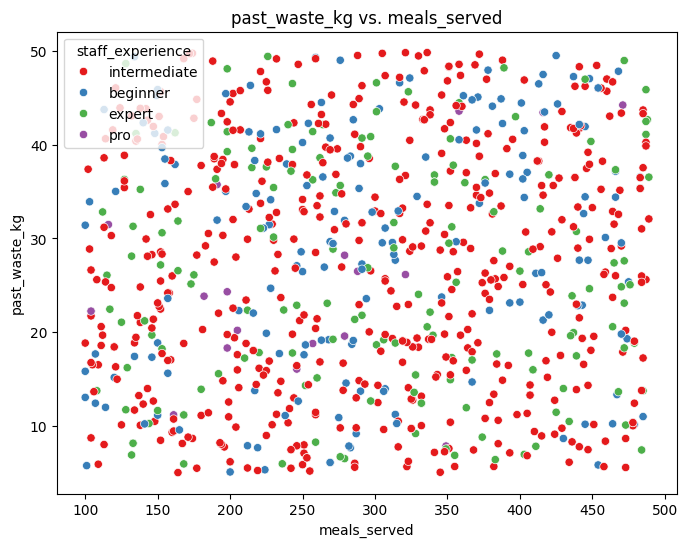

In [1303]:
continuous_columns = ['meals_served','temperature', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='meals_served', y='past_waste_kg', data=df, hue='staff_experience', palette="Set1")
plt.title('past_waste_kg vs. meals_served')
plt.xlabel('meals_served')
plt.ylabel('past_waste_kg')
plt.show()

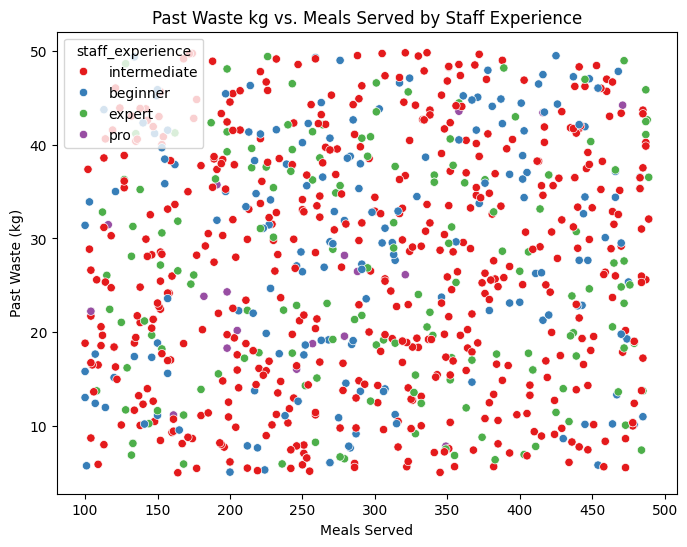

Correlation between meals_served and past_waste_kg: 0.07403277595009583

Summary Statistics for Meals Served and Past Waste by Staff Experience:
                 meals_served                                               \
                        count        mean         std    min    25%    50%   
staff_experience                                                             
beginner                174.0  296.701149  108.125876  100.0  221.5  283.5   
expert                  163.0  301.239264  113.358158  104.0  211.0  301.0   
intermediate            515.0  298.227184  111.446838  100.0  202.5  306.0   
pro                      19.0  267.947368  108.522642  104.0  194.5  257.0   

                                past_waste_kg                                  \
                     75%    max         count       mean        std       min   
staff_experience                                                                
beginner          398.25  485.0         174.0  28.962801  12.7664

In [1304]:
# Scatter plot with hue by staff experience
plt.figure(figsize=(8, 6))
sns.scatterplot(x='meals_served', y='past_waste_kg', data=df, hue='staff_experience', palette="Set1")
plt.title('Past Waste kg vs. Meals Served by Staff Experience')
plt.xlabel('Meals Served')
plt.ylabel('Past Waste (kg)')
plt.show()

# Compute correlation between meals_served and past_waste_kg
correlation = df[['meals_served', 'past_waste_kg']].corr()
print(f"Correlation between meals_served and past_waste_kg: {correlation.iloc[0, 1]}")

# Grouping by staff_experience and computing statistics
staff_experience_stats = df.groupby('staff_experience')[['meals_served', 'past_waste_kg']].describe()
print("\nSummary Statistics for Meals Served and Past Waste by Staff Experience:")
print(staff_experience_stats)



There is a weak correlation between meals served and past waste, indicating that the two factors may not be directly linked. The differences in waste across staff experience levels suggest that less experienced staff may be more prone to inefficiencies, while experienced staff tend to produce less waste. However, the relatively high maximum waste across all staff categories suggests that other factors may contribute to waste levels, beyond just staff experience or the volume of meals served.

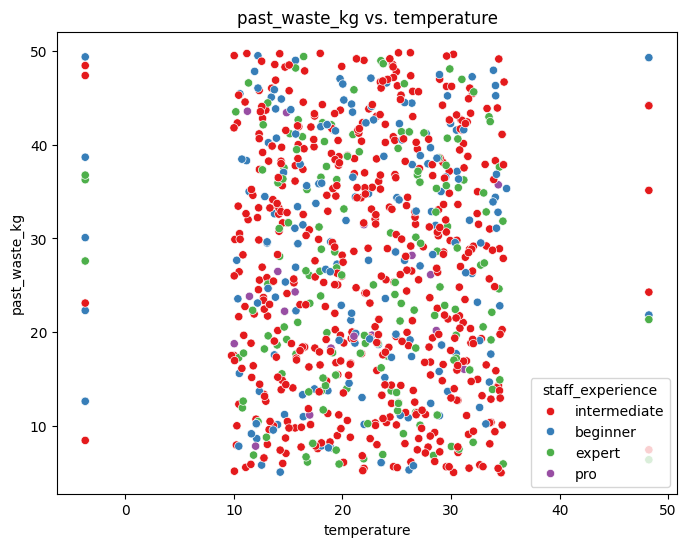

In [1305]:
continuous_columns = ['meals_served','temperature_C', 'humidity_percent', 'past_waste_kg']
categorical_columns = ['kitchen_staff','special_event','waste_category', 'staff_experience']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_C', y='past_waste_kg', data=df, hue='staff_experience', palette="Set1")
plt.title('past_waste_kg vs. temperature')
plt.xlabel('temperature')
plt.ylabel('past_waste_kg')
plt.show()

In [1306]:
# Summary statistics for past_waste_kg grouped by staff experience and temperature
temperature_waste_summary = df.groupby('staff_experience')[['temperature_C', 'past_waste_kg']].describe()

# Correlation between temperature and past waste
correlation_temp_waste = df[['temperature_C', 'past_waste_kg']].corr().iloc[0, 1]

print("\nSummary Statistics for Past Waste by Temperature and Staff Experience:")
print(temperature_waste_summary)

print("\nCorrelation between temperature and past_waste_kg:", correlation_temp_waste)



Summary Statistics for Past Waste by Temperature and Staff Experience:
                 past_waste_kg                                             \
                         count       mean        std       min        25%   
staff_experience                                                            
beginner                 174.0  28.962801  12.766404  5.073969  18.627345   
expert                   163.0  25.839783  12.251123  5.934111  15.761782   
intermediate             515.0  26.685061  12.957530  5.008394  15.448609   
pro                       19.0  25.319099  10.438425  7.840846  19.170005   

                                                   
                        50%        75%        max  
staff_experience                                   
beginner          29.860764  40.432648  49.484299  
expert            24.824262  36.432347  49.395340  
intermediate      26.440757  38.020275  49.803703  
pro               23.823100  29.826474  44.209186  

Correlation between tem

Insights:

The correlation between temperature_C and past_waste_kg is very low at -0.013, indicating almost no linear relationship between temperature and the amount of waste produced. The negative correlation suggests a slight inverse relationship, but it is weak and unlikely to be meaningful in this case.

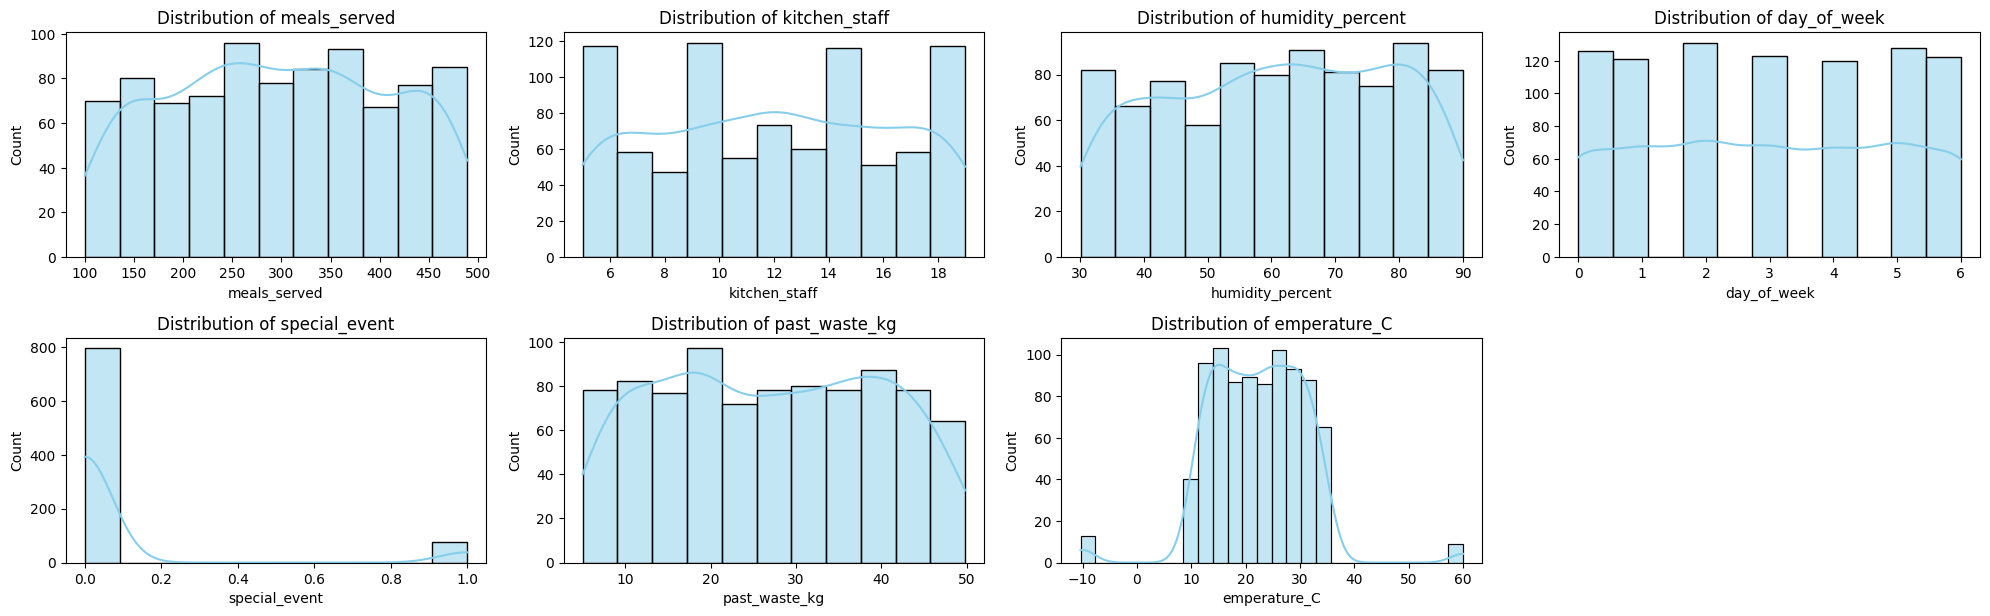

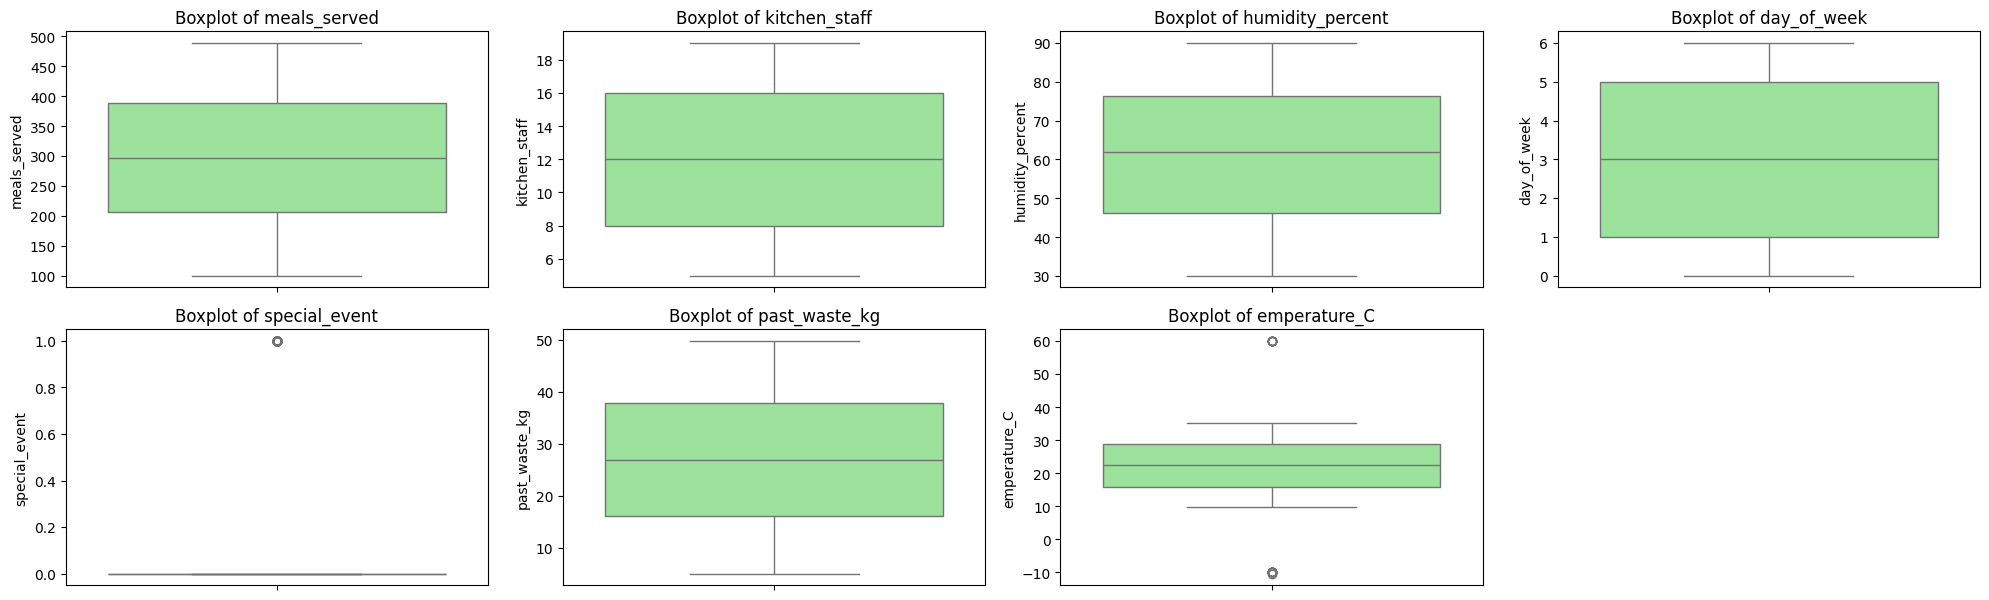

In [1307]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Distribution Visualizations
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()






In [1308]:
# @title Time based Analysis


Meals Served

Fairly uniform distribution across the range.

Median around 300; no extreme outliers.

➤ Insight: Meal volume is steady and predictable, suitable for planning and modeling.

Kitchen Staff

Even spread from ~5 to 18 staff members.

No outliers observed.

➤ Insight: Staffing is well-adjusted to kitchen needs and scales with operations.

Humidity Percent

Slightly left-skewed; most values between 50%–80%.

Normal range with no extreme values.

➤ Insight: Environmental humidity is fairly consistent — may subtly affect food spoilage rates.

Day of Week

Even distribution (0–6); equal representation of all weekdays.

➤ Insight: No sampling bias — each day is equally observed.

Special Event

Highly skewed — events are rare (~0.1 frequency).

One clear outlier in boxplot (1).

➤ Insight: Special events are infrequent but may cause operational spikes or anomalies in waste.

Past Waste (kg)

Slight right-skew; most waste values are under 35 kg.

Spread is reasonable with no extreme outliers.

➤ Insight: Waste levels are within control. Moderate variance suggests room for further optimization.

Temperature (°C)

Normally distributed around ~25°C.

A few low and high outliers (e.g., ~-10°C and ~60°C).

➤ Insight: Most operations happen in normal temperatures; rare extremes could influence food safety or waste.

<ipython-input-1309-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
<ipython-input-1309-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
<ipython-input-1309-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
<ipython-input-1309-620d7203580d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend

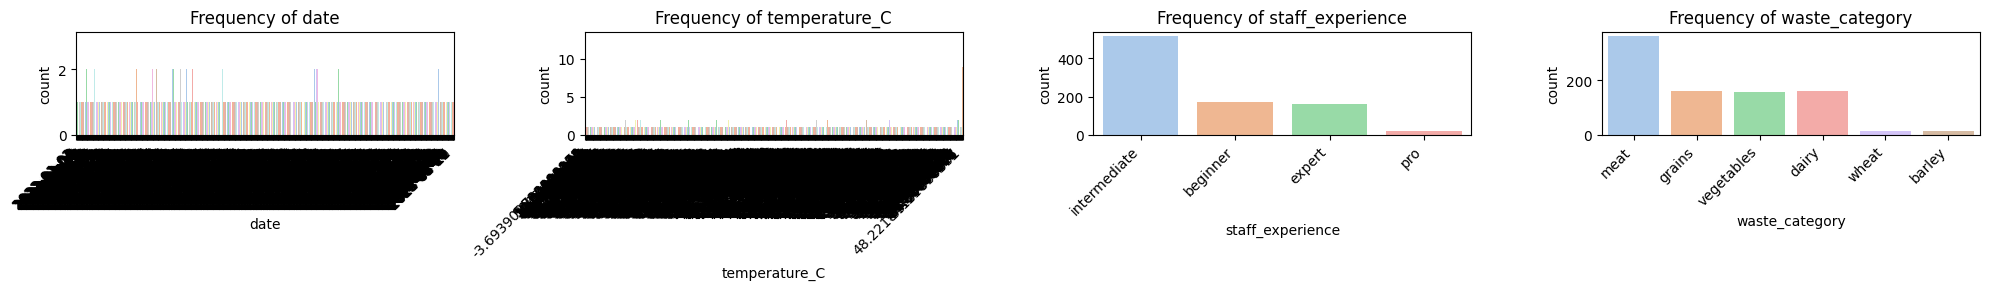

In [1309]:
# 3. Categorical Variable Visualizations
categorical_cols = df.select_dtypes(exclude=['number']).columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(8, 4, i + 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion

The EDA revealed key patterns in food waste generation and operational behavior. Despite weak environmental correlations, staff experience and service volume emerged as critical dimensions to address food waste and improve efficiency. This analysis provides a strong base for implementing data-driven process improvements in kitchen operations.

To minimize food waste and optimize meal service efficiency, it is recommended to focus on improving waste management strategies, particularly for meat, which is the most wasted category. While staff experience and temperature have minimal direct impact on waste levels, operational practices such as staff training, efficient food handling, and waste protocols should be prioritized. Maintaining an optimal kitchen staff size of 6 to 16 members is crucial for maximizing meal service capacity and minimizing waste. Special events, though infrequent, show a slight increase in both meals served and waste, so it’s important to plan waste reduction efforts accordingly. Given the operational consistency observed, a more targeted approach to waste management, focusing on specific food categories and improving staff efficiency, will likely yield the most substantial reductions in food waste. Ultimately, leveraging data to monitor and adjust these factors in real-time can lead to more sustainable and cost-effective kitchen operations.
